# CPG

El CPG, Central Patron Generator, o Generador Central de Patrones, es una parte del sistema nervioso que genera pulsos para coordinar actividades sin la necesidad de recibir un estímulo externo, cómo la locomoción.

A nivel programación, contamos con el modelo de una neurona BMS, y vamos a construir una función que tome la matríz de conexión, y una matriz de estados iniciales, de forma que se emule un CPG a tiempo discreto.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cambio2(i, k, V, W, Z, N, gamma = 0.5, i_ext = 0.1, theta = 1):
    a = sum([W[i][j]*Z[j][k-1] for j in range(N)])

    V[i][k] = gamma * V[i][k-1] * (1 - Z[i][k-1]) + i_ext + a
    Z[i][k] = 1 if V[i][k] >= theta else 0 

In [3]:
class CPG:
    def __init__(self, K:int, W, V_0, gamma = 0.5, i_ext = 0.1, theta = 1):
        self.N = len(W)
        #print(self.N)
        self.gamma = gamma
        self.i_ext = i_ext
        self.theta = theta
        self.W = W
        self.V_0 = V_0              # Estado inicial
        self.K = K                  
        #print(V_0.shape)
        #print(np.zeros((self.N, k)).shape)
        self.V = np.concatenate((V_0, np.zeros((self.N, K))), axis = 1)  
        self.Z = self.V.copy()
        
        for i in range(self.N):
            self.Z[i][0] = 1 if self.V[i][0] >= theta else 0
        
        #print(self.Z)
        #print(self.V)

    def cambio(self, i, k):
        acum = sum([self.W[i][j]*self.Z[j][k-1] for j in range(self.N)])

        self.V[i][k] = self.gamma * self.V[i][k-1] * (1 - self.Z[i][k-1]) + self.i_ext + acum
        self.Z[i][k] = 1 if self.V[i][k] >= self.theta else 0 

    def print_V(self):
        print(self.V)

    def simulacion(self):
        for k in range(1, self.K):
            for i in range(self.N):
                self.cambio(i, k)
        return self.Z

In [4]:
pesos = np.array([[0, 0.8],[1.7, 0]])
inicio = np.array([[0.8], [1.2]])

prueba = CPG(6, pesos, inicio)
Z = prueba.simulacion()
print(Z)

[[0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0.]]


In [5]:
W_w = np.array([
    [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 9],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [6, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
    [0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 6, 0, 0, 0, 0, 0, 5, 0, 0]
])
Ini = np.array([
    [0],
    [0],
    [0],
    [1],
    [0.5],
    [0],
    [0.5],
    [0],
    [0],
    [1]
])
prueba2 = CPG(11, W_w, Ini)
Z = prueba2.simulacion()
print(Z)

[[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]


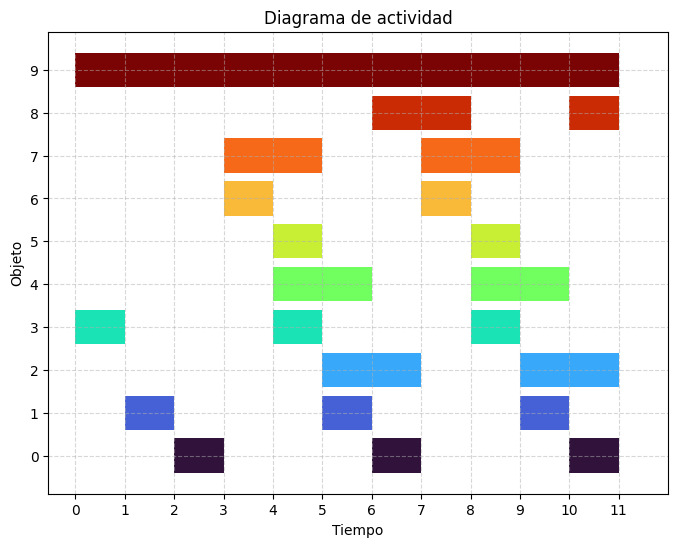

In [6]:
from graficas import graph 
    
graph(Z)
plt.show()

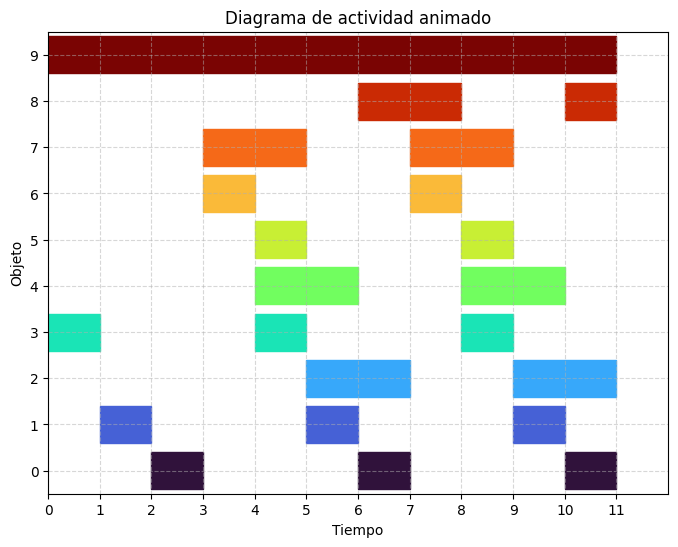

In [7]:
from graficas import anigraph


anigraph(Z)
plt.show()

In [8]:
W_aio = np.array([
    [0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [-7, 0, 4, 2, -2, 0, 1, 2, 0, 0, 2, 0],
    [-9, -5, 0, 8, 4, 1, 0, -2, 4, 0, 0, 0],
    [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0],
    [6, 0, 0, 0, -9, 0, 0, 0, 3, 0, 3, -1],
    [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0],
    [0, -4, 0, 0, 0, -3, 0, -2, 0, 0, 3, 9],
    [0, 1, 0, -3, 8, -1, 5, 0, -4, 0, -4, 0]
])

#print(W_aio.shape)

Init_walk = np.array([
    [0],
    [0],
    [0],
    [1],
    [1],
    [0],
    [1],
    [0],
    [0],
    [0],
    [0],
    [1]
])

Init_jog = np.array([
    [1],
    [0],
    [0],
    [0],
    [0],
    [1],
    [0],
    [0],
    [0],
    [1],
    [1],
    [0]
])

Init_run = np.array([
    [1],
    [0],
    [0],
    [1],
    [1],
    [0],
    [0],
    [1],
    [1],
    [0],
    [0],
    [1]
])

times = 11

W_aio_N = W_aio #/np.linalg.norm(W_aio)
Z_walk = CPG(times, W_aio_N, Init_walk, i_ext = 0)
Z_jog = CPG(times, W_aio_N, Init_jog, i_ext = 0)
Z_run = CPG(times, W_aio_N, Init_run, i_ext = 0)

In [9]:
W = np.zeros(shape=(12,12))

W[0,1] =  8
W[1,4] = -2
W[1,6] =  1
W[1,7] =  2
W[1,0] = -7
W[1,10] = 2
W[1,2] =  4
W[1,3] =  2
W[2,5] =  1
W[2,7] = -2
W[2,4] =  4
W[2,8] =  4
W[2,1] = -5
W[2,0] = -9
W[2,3] =  8
W[3,4] =  8
W[4,5] =  5
W[5,8] =  3 
W[5,4] = -9 
W[5,10] = 3
W[5,11] =-1 
W[5,0] =  6 
W[6,7] =  5
W[7,8] =  4
W[8,9] =  8
W[9,10] = 9
W[10,7] =-2
W[10,1] =-4
W[10,11] =9
W[10,10] =3
W[10,5] =-3
W[11,4] = 8
W[11,1] = 1
W[11,8] =-4
W[11,5] =-1
W[11,3] =-3
W[11,6] = 5
W[11,10]=-4

w_state = np.array([[1],[0],[0],[0],[0],[1],[0],[1],[1],[0],[0],[0]])
j_state = np.array([[0],[1],[1],[0],[0],[0],[1],[0],[0],[0],[0],[1]])
r_state = np.array([[1],[0],[0],[1],[1],[0],[0],[1],[1],[0],[0],[1]])

print((W == W_aio).all())

print((Init_walk == w_state).all())
print((Init_jog == j_state).all())
print((Init_run == r_state).all())

times = 11

Z_walk = CPG(times, W, w_state, i_ext = 0)
Z_jog = CPG(times, W, j_state, i_ext = 0)
Z_run = CPG(times, W, r_state, i_ext = 0)

True
False
False
True


Walk


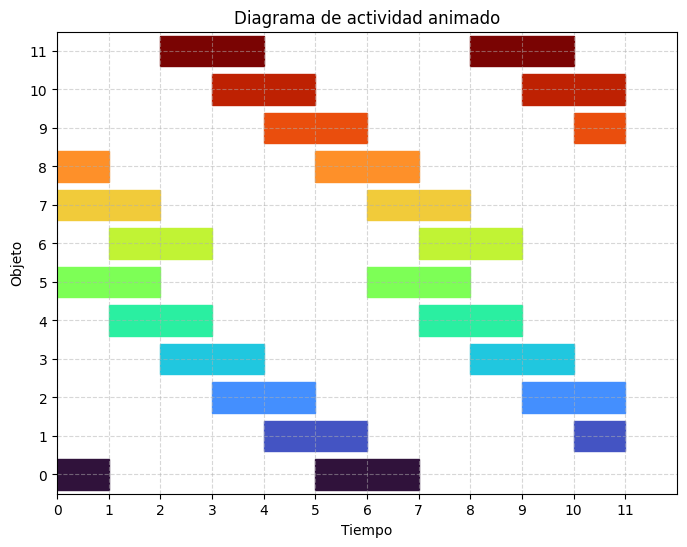

Jog


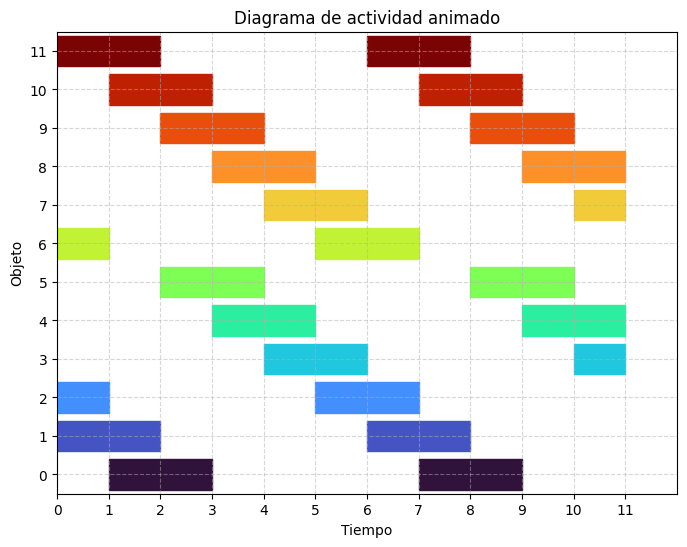

Run


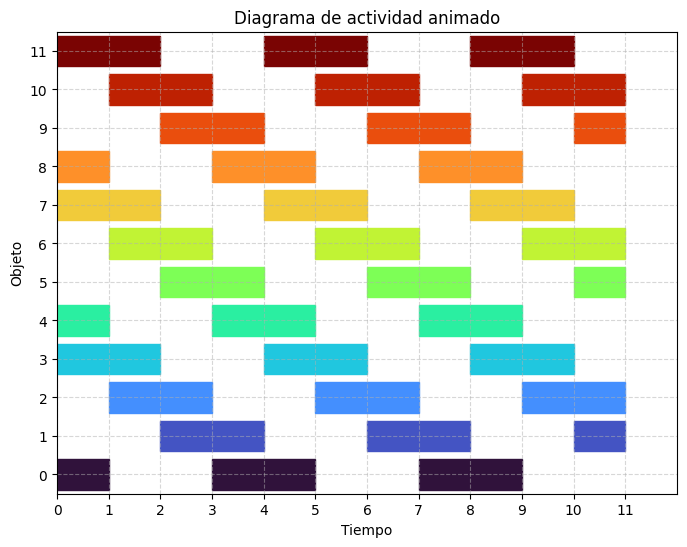

In [10]:
walk_graph = Z_walk.simulacion()
print("Walk")
anigraph(walk_graph, "Walking")
plt.show()
#print(walk_graph)

jog_graph = Z_jog.simulacion() 
print("Jog")
anigraph(jog_graph, "Jogging")
plt.show()
#print(jog_graph)

run_graph = Z_run.simulacion()
print("Run")
anigraph(run_graph, "Running")
plt.show()
#print(run_graph)